In [23]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Fonction pour charger les images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img.flatten())
    return np.array(images), img.shape

In [25]:
# Chemin vers le dossier contenant les images
folder_path = './data/Test1/Apple Braeburn'
images, original_shape = load_images_from_folder(folder_path)

In [26]:
mean_image = np.mean(images, axis=0)
centered_images = images - mean_image

In [27]:
pca = PCA()
pca.fit(centered_images)

PCA()

In [28]:
# Variance cumulée et nombre de composantes pour 95% de variance expliquée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

In [29]:
# Réduire les données à num_components_95 dimensions
pca_95 = PCA(n_components=num_components_95)
reduced_images = pca_95.fit_transform(centered_images)

In [30]:
# Reconstruction de l'image simplifiée
reconstructed_flat_image = pca_95.inverse_transform(reduced_images[0]) + mean_image

In [31]:
def reshape_image(flat_image, original_shape):
    return flat_image.reshape(original_shape)

simplified_image = reshape_image(reconstructed_flat_image, original_shape)

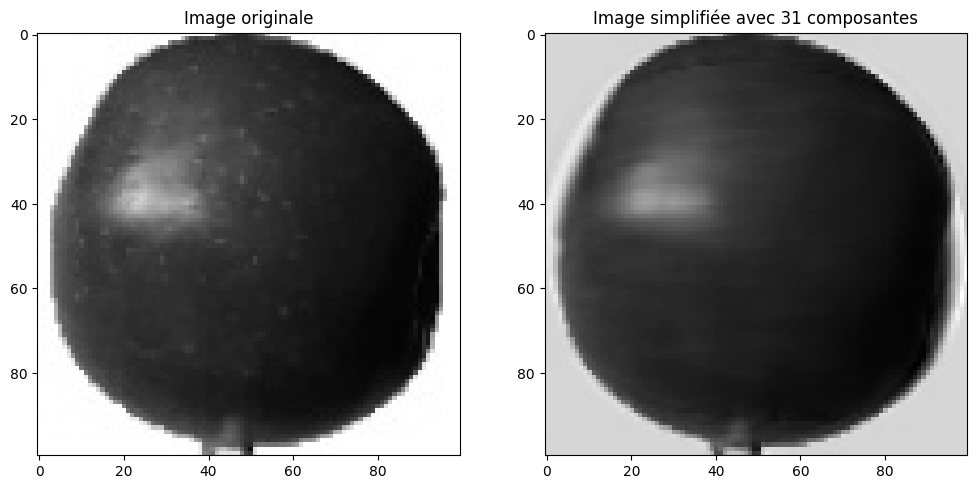

In [42]:
# Afficher les images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image originale")
plt.imshow(Image.fromarray(images[0].reshape((100, 100))), cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f"Image simplifiée avec {num_components_95} composantes")
plt.imshow(simplified_image, cmap='gray')
plt.show()